# **Taller 1 - Demanda de ocupación hotelera**

### **Integrantes:**
- María Alejandra Pérez Petro - 201923972
- Daniel Esteban Aguilera Figueroa - 202010592 

### 1. **Entendimiento de los datos**

A continuación se cargan los datos presentados en el archivo `hotel_bookings_modified.csv` y se muestran las primeras filas para entender la estructura de los datos.

Se importan las librerías necesarias para el análisis de los datos.

In [102]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

Se cargan los datos

In [103]:
hotel_df: pd.DataFrame = pd.read_csv("./data/hotel_bookings_modified.csv")

C:\Users\dania\AppData\Local\Temp\ipykernel_16476\2746181375.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  hotel_df: pd.DataFrame = pd.read_csv("./data/hotel_bookings_modified.csv")


In [104]:
hotel_df.shape

(58895, 33)

Se revisan las dimensiones del dataset. Este cuenta con 33 columnas y 58895 filas

In [105]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Se listan los atributos del dataset y sus tipos, es importante mencionar un problema que existe con la columna Company, cuenta con un mixed type que es necesario arreglar más adelante 

In [106]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,...,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,...,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,...,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN


De igual manera, se hace un profilling general para una mejor revisión de todas las variables

In [107]:
profile = ProfileReport(hotel_df)

In [ ]:
# profile.to_file('report.html')

c:\Users\dania\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Summarize dataset:  88%|████████▊ | 35/40 [00:02<00:00, 20.39it/s, Calculate auto correlation]                      c:\Users\dania\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x000002367391BCB0, file "c:\Users\dania\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\model\pandas\correlations_pandas.py", line 167>')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 19.96it/s]


### **Top 5 atributos más importantes para el análisis**

Basándome en el contexto del negocio hotelero y los objetivos de análisis (optimización de ocupación, gestión de cancelaciones, políticas de precios), he seleccionado los siguientes 5 atributos como los más importantes:

#### **1. is_canceled** 
Variable objetivo principal para entender patrones de cancelación

#### **2. adr (Average Daily Rate)**
Indicador clave de ingresos y estrategia de precios

#### **3. lead_time**
Tiempo de anticipación de la reserva - crucial para planificación y gestión de demanda

#### **4. hotel**
Tipo de hotel (Resort vs City) - segmentación fundamental del negocio

#### **5. customer_type**
Tipo de cliente - esencial para entender diferentes segmentos y sus comportamientos


#### **1. Análisis de is_canceled (Variable de cancelación)**

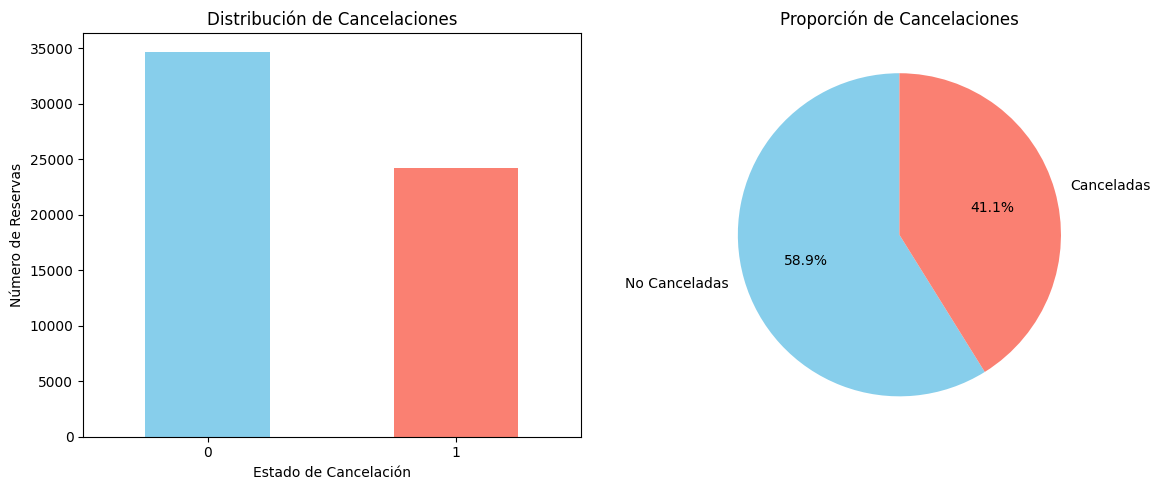

In [109]:
# Distribución de cancelaciones
cancelation_stats = hotel_df['is_canceled'].value_counts()
cancelation_pct = hotel_df['is_canceled'].value_counts(normalize=True) * 100

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
cancelation_stats.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Distribución de Cancelaciones')
ax1.set_xlabel('Estado de Cancelación')
ax1.set_ylabel('Número de Reservas')
ax1.tick_params(axis='x', rotation=0)

# Gráfico de pastel
ax2.pie(cancelation_stats.values, labels=['No Canceladas', 'Canceladas'], 
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
ax2.set_title('Proporción de Cancelaciones')

plt.tight_layout()
plt.show()


#### **2. Análisis de adr (Average Daily Rate)**

Estadísticas descriptivas:
Media: $96.25
Mediana: $84.00
Desviación estándar: $58.56
Mínimo: $-6.38
Máximo: $5400.00
Q1 (25%): $60.00
Q3 (75%): $120.00


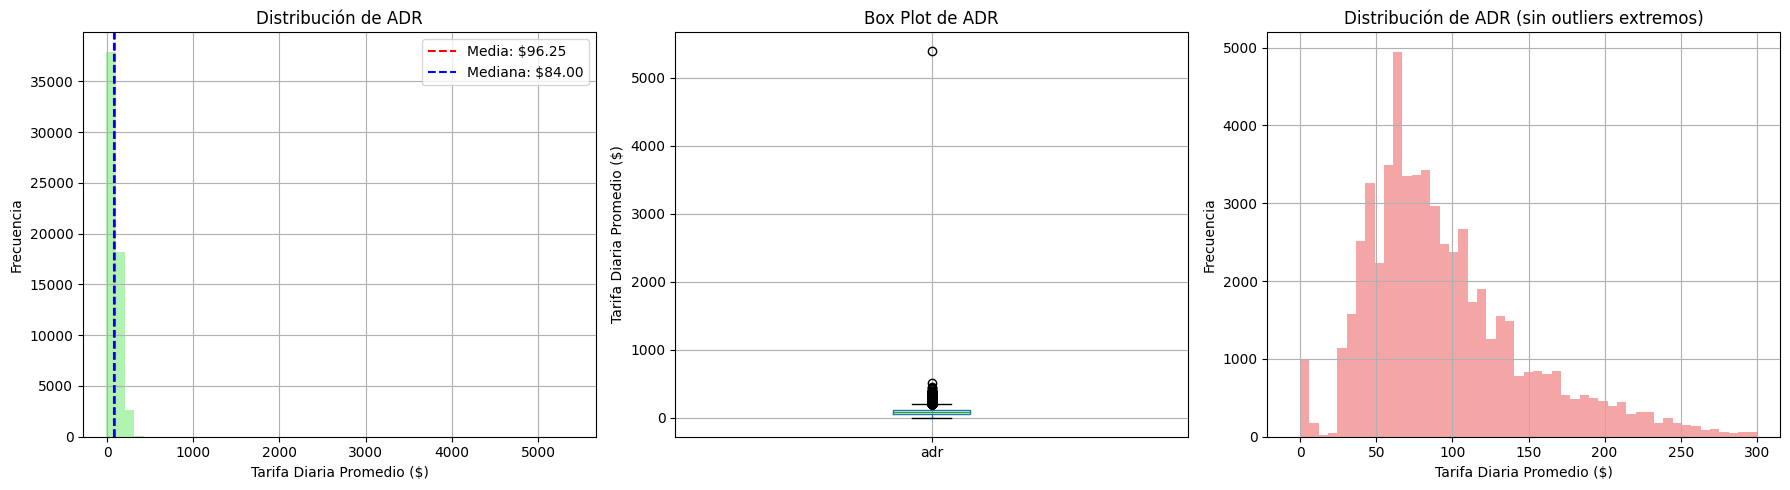

In [110]:
# Estadísticas descriptivas
adr_stats = hotel_df['adr'].describe()
print(f"Estadísticas descriptivas:")
print(f"Media: ${adr_stats['mean']:.2f}")
print(f"Mediana: ${adr_stats['50%']:.2f}")
print(f"Desviación estándar: ${adr_stats['std']:.2f}")
print(f"Mínimo: ${adr_stats['min']:.2f}")
print(f"Máximo: ${adr_stats['max']:.2f}")
print(f"Q1 (25%): ${adr_stats['25%']:.2f}")
print(f"Q3 (75%): ${adr_stats['75%']:.2f}")

# Visualización
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
hotel_df['adr'].hist(bins=50, ax=ax1, color='lightgreen', alpha=0.7)
ax1.set_title('Distribución de ADR')
ax1.set_xlabel('Tarifa Diaria Promedio ($)')
ax1.set_ylabel('Frecuencia')
ax1.axvline(adr_stats['mean'], color='red', linestyle='--', label=f'Media: ${adr_stats["mean"]:.2f}')
ax1.axvline(adr_stats['50%'], color='blue', linestyle='--', label=f'Mediana: ${adr_stats["50%"]:.2f}')
ax1.legend()

# Box plot
hotel_df.boxplot(column='adr', ax=ax2)
ax2.set_title('Box Plot de ADR')
ax2.set_ylabel('Tarifa Diaria Promedio ($)')

# Histograma sin outliers extremos (para mejor visualización)
Q1 = adr_stats['25%']
Q3 = adr_stats['75%']
adr_filtered = hotel_df[hotel_df['adr'] <= adr_stats['75%'] + 3 * (Q3 - Q1)]['adr']
adr_filtered.hist(bins=50, ax=ax3, color='lightcoral', alpha=0.7)
ax3.set_title('Distribución de ADR (sin outliers extremos)')
ax3.set_xlabel('Tarifa Diaria Promedio ($)')
ax3.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


#### **3. Análisis de lead_time (Tiempo de anticipación)**

In [111]:
# Categorización del lead time
def categorize_lead_time(days):
    if days == 0:
        return 'Mismo día'
    elif days <= 7:
        return '1 semana'
    elif days <= 30:
        return '1 mes'
    elif days <= 90:
        return '3 meses'
    elif days <= 180:
        return '6 meses'
    else:
        return 'Más de 6 meses'

Estadísticas descriptivas:
Media: 100.05 días
Mediana: 69.00 días
Desviación estándar: 101.16 días
Mínimo: 0 días
Máximo: 737 días
Q1 (25%): 17.00 días
Q3 (75%): 157.00 días


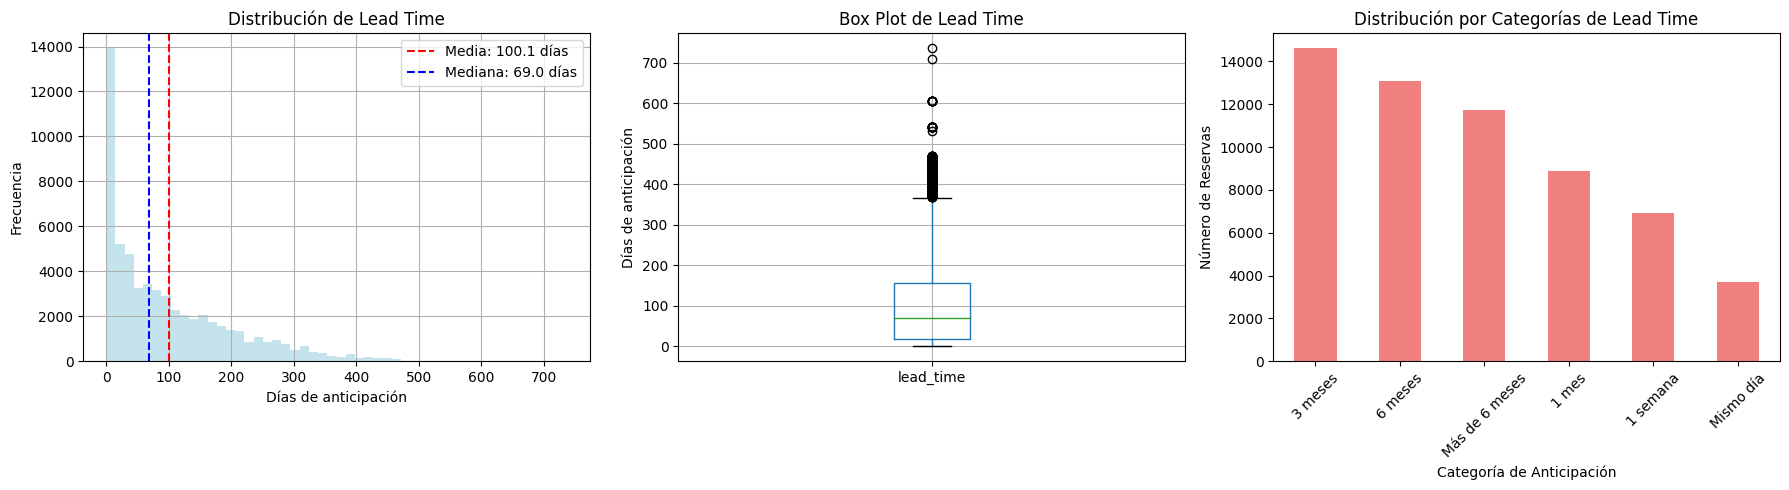

In [112]:
# Estadísticas descriptivas
lead_time_stats = hotel_df['lead_time'].describe()
print(f"Estadísticas descriptivas:")
print(f"Media: {lead_time_stats['mean']:.2f} días")
print(f"Mediana: {lead_time_stats['50%']:.2f} días")
print(f"Desviación estándar: {lead_time_stats['std']:.2f} días")
print(f"Mínimo: {lead_time_stats['min']:.0f} días")
print(f"Máximo: {lead_time_stats['max']:.0f} días")
print(f"Q1 (25%): {lead_time_stats['25%']:.2f} días")
print(f"Q3 (75%): {lead_time_stats['75%']:.2f} días")

hotel_df['lead_time_category'] = hotel_df['lead_time'].apply(categorize_lead_time)
lead_time_categories = hotel_df['lead_time_category'].value_counts()

# Visualización
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
hotel_df['lead_time'].hist(bins=50, ax=ax1, color='lightblue', alpha=0.7)
ax1.set_title('Distribución de Lead Time')
ax1.set_xlabel('Días de anticipación')
ax1.set_ylabel('Frecuencia')
ax1.axvline(lead_time_stats['mean'], color='red', linestyle='--', label=f'Media: {lead_time_stats["mean"]:.1f} días')
ax1.axvline(lead_time_stats['50%'], color='blue', linestyle='--', label=f'Mediana: {lead_time_stats["50%"]:.1f} días')
ax1.legend()

# Box plot
hotel_df.boxplot(column='lead_time', ax=ax2)
ax2.set_title('Box Plot de Lead Time')
ax2.set_ylabel('Días de anticipación')

# Gráfico de barras por categorías
lead_time_categories.plot(kind='bar', ax=ax3, color='lightcoral')
ax3.set_title('Distribución por Categorías de Lead Time')
ax3.set_xlabel('Categoría de Anticipación')
ax3.set_ylabel('Número de Reservas')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Limpiar columna temporal
hotel_df.drop('lead_time_category', axis=1, inplace=True)

#### **4. Análisis de hotel (Tipo de hotel)**

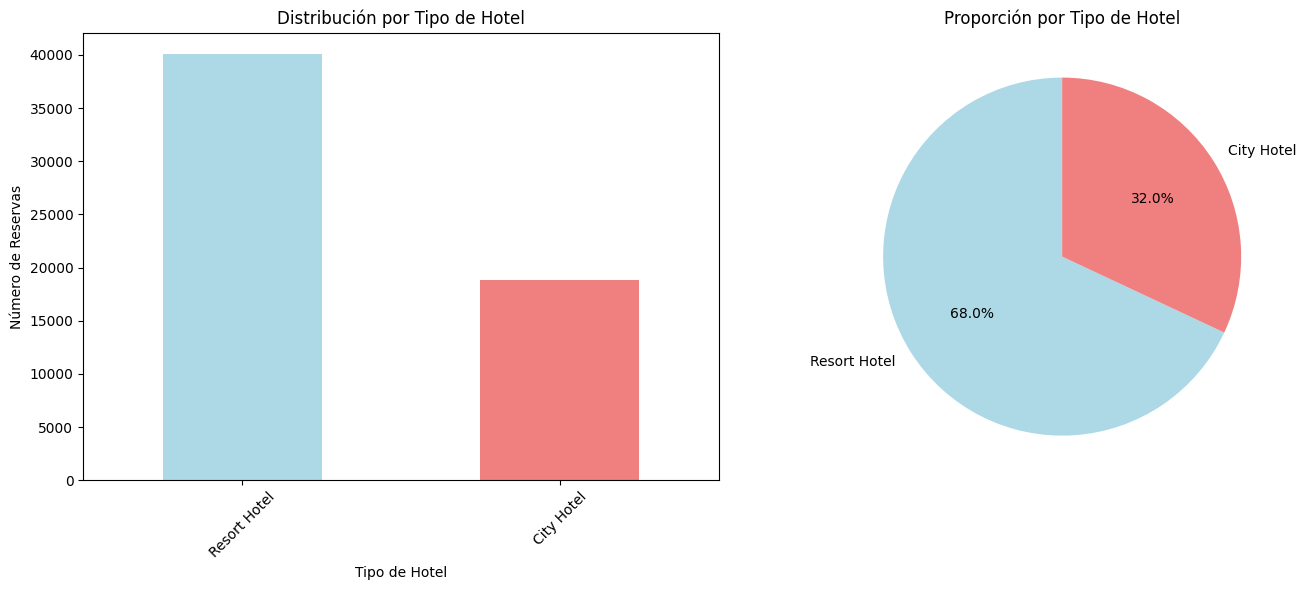

In [113]:
# Distribución por tipo de hotel
hotel_stats = hotel_df['hotel'].value_counts()
hotel_pct = hotel_df['hotel'].value_counts(normalize=True) * 100

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras
hotel_stats.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Distribución por Tipo de Hotel')
ax1.set_xlabel('Tipo de Hotel')
ax1.set_ylabel('Número de Reservas')
ax1.tick_params(axis='x', rotation=45)

# Gráfico de pastel
ax2.pie(hotel_stats.values, labels=hotel_stats.index, autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'lightcoral'])
ax2.set_title('Proporción por Tipo de Hotel')

plt.tight_layout()
plt.show()


#### **5. Análisis de customer_type (Tipo de cliente)**

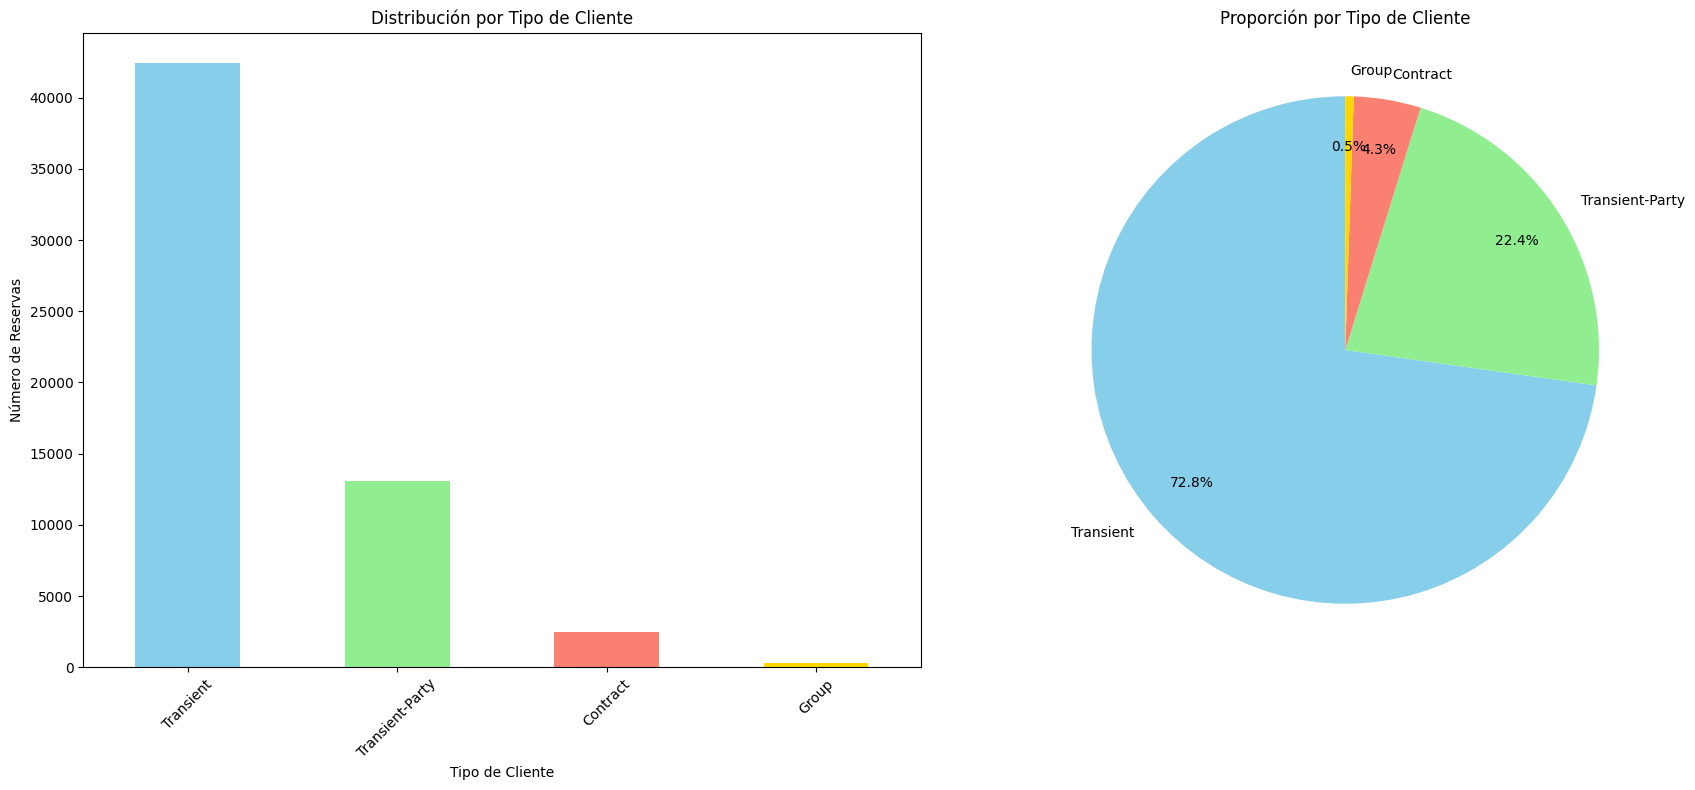

In [114]:
# Distribución por tipo de cliente
customer_stats = hotel_df['customer_type'].value_counts()
customer_pct = hotel_df['customer_type'].value_counts(normalize=True) * 100

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de barras
customer_stats.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax1.set_title('Distribución por Tipo de Cliente')
ax1.set_xlabel('Tipo de Cliente')
ax1.set_ylabel('Número de Reservas')
ax1.tick_params(axis='x', rotation=45)

# Pie Chart
ax2.pie(
    customer_stats.values, 
    labels=customer_stats.index, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['skyblue', 'lightgreen', 'salmon', 'gold'],
    pctdistance=0.8,
    labeldistance=1.1
)
ax2.set_title('Proporción por Tipo de Cliente')

plt.tight_layout()
plt.show()


### 2. **Estrategia de análisis**

La estrategia de análisis consistirá en estudiar la relación entre la variable objetivo is_canceled y los principales factores asociados al comportamiento de las reservas (adr, lead_time, hotel y customer_type). En una primera etapa se calcularán estadísticos descriptivos (medias, medianas, distribuciones y tasas de cancelación) y se aplicarán análisis univariados y multivariados que permitan identificar, por ejemplo: cómo varía la tarifa diaria promedio según el tipo de hotel, o cómo el tiempo de anticipación afecta la probabilidad de cancelación.

Posteriormente, se emplearán técnicas de visualización multivariada como histogramas comparativos, boxplots y gráficos de barras segmentados para estudiar combinaciones de variables (ejemplo: tasa de cancelación por tipo de cliente y rango de lead_time). Además, se trabajarán mapas de calor para encontrar las variables con mayor correlación con la variable objetivo. Estas herramientas permitirán identificar segmentos de clientes, tipos de hotel y ventanas de reserva donde se concentran mayores cancelaciones o mayores ingresos. Con base en estos hallazgos, será posible formular recomendaciones para mejorar la ocupación y reducir la tasa de cancelación.